In [200]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SciKitLinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [201]:
my_feature = [1.0, 2.0,4.0,5.0,7.0,9.0,11.0,12.0]
my_label   = [5.0, 8.8,14.2,18.8,21.4,28.9,33.8,38.2]
my_feature_test = [3.0,6.0,8.0,10.0]
my_label_test = [9.6,19.5,26.8,32.0]

In [202]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples = len(X)
        self.weights = 0
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [203]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

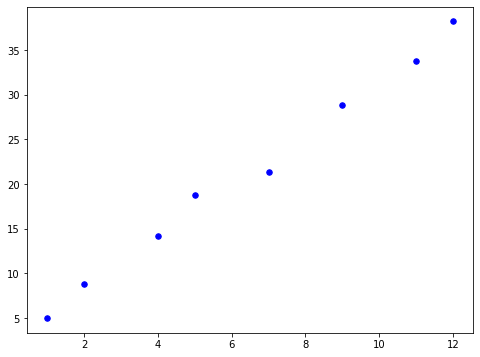

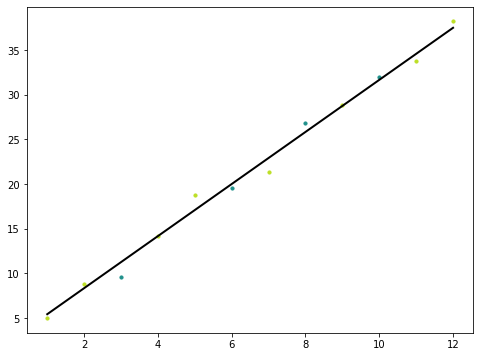

In [204]:
fig = plt.figure(figsize=(8,6))
plt.scatter(my_feature, my_label, color = "b", marker = "o", s = 30)
plt.show()
reg = LinearRegression(lr=0.01)
reg.fit(my_feature,my_label)
predictions = reg.predict(my_feature_test)
# mse = mse(my_label_test, predictions)
# print(mse)
y_pred_line = reg.predict(my_feature)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(my_feature, my_label, color=cmap(0.9), s=10)
m2 = plt.scatter(my_feature_test, my_label_test, color=cmap(0.5), s=10)
plt.plot(my_feature, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

In [205]:
def LeastSquareMethod(X,Y):
    Xm = np.mean(X)
    Ym = np.mean(Y)
    num = 0
    den = 0
    for i in range(len(X)):
        num = num + (X - Xm ) * (Y-Ym)
        den = den + ( X - Xm ) ** 2
    m = num / den  
    c = Ym - m * Xm
    Y_pred = m * X + c
    return Y_pred

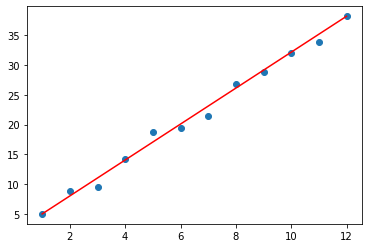

In [206]:
my_feature = [1.0, 2.0,4.0,5.0,7.0,9.0,11.0,12.0,3.0,6.0,8.0,10.0]
my_label   = [5.0, 8.8,14.2,18.8,21.4,28.9,33.8,38.2,9.6,19.5,26.8,32.0]
Y_pred = LeastSquareMethod(my_feature,my_label)
plt.scatter(my_feature,my_label) # actual
#plt.plot(my_feature, Y_pred, color='red')
plt.plot([min(my_feature), max(my_feature)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [207]:
my_feature = [[1.0], [2.0],[4.0],[5.0],[7.0],[9.0],[11.0],[12.0],[3.0],[6.0],[8.0],[10.0]]
my_label   = [[5.0], [8.8],[14.2],[18.8],[21.4],[28.9],[33.8],[38.2],[9.6],[19.5],[26.8],[32.0]]
X_train, X_test, y_train, y_test = train_test_split(my_feature, my_label, test_size = 0.25)
regr = SciKitLinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9921949624114932


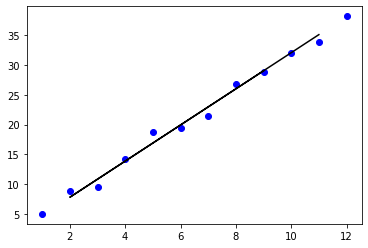

In [208]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [209]:
X_train = [1.0, 2.0,4.0,5.0,7.0,9.0,11.0,12.0]
y_train = [5.0, 8.8,14.2,18.8,21.4,28.9,33.8,38.2]
X_test = [3.0,6.0,8.0,10.0]
y_test = [9.6,19.5,26.8,32.0]

In [210]:
def rms(y_true, y_pred): #calculate rms error 
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
def ANN(X_train, Y_train, X_test, y_test):
#     model.add(Dense(units=20 , activation='relu', input_dim =len(X_train)))
#     model.add(Dense(1))
#  model = Sequential([Dense(1),tf.keras.Input(shape=(1,))])
    model = Sequential()
    model.add(Dense(units=20 , activation='relu'))
    model.add(Dense(1))
    model.compile(loss=rms,optimizer=Adam(),metrics=[rms])
# model.fit(X_train, Y_train, epochs=100)
    model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500) # updated line
    Y_pred = model.predict(X_test)
    rms(y_test, Y_pred).numpy()
    return Y_pred

In [211]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_predN = ANN(X_train,y_train,X_test,y_test)

Epoch 1/500
1/1 [==============================] - 1s 712ms/step - loss: 20.1390 - rms: 20.1390
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 20.0980 - rms: 20.0980
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 20.0571 - rms: 20.0571
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 20.0160 - rms: 20.0160
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 19.9750 - rms: 19.9750
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 19.9339 - rms: 19.9339
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 19.8928 - rms: 19.8928
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 19.8516 - rms: 19.8516
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 19.8104 - rms: 19.8104
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 19.7691 - rms: 19.7691
Epoch 11/500
1/1 [==============================] - 0s 

In [212]:
print(y_predN)

[[10.989041]
 [19.884935]
 [25.815533]
 [31.746128]]


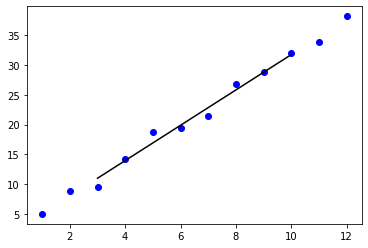

In [213]:
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_predN, color ='k')
plt.show()